Setting up project directory...
/content/yolo_project

Starting model training...
Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=coco128_run2, nbs=64, nms=False, opset=None, optimize=False, optimizer=a

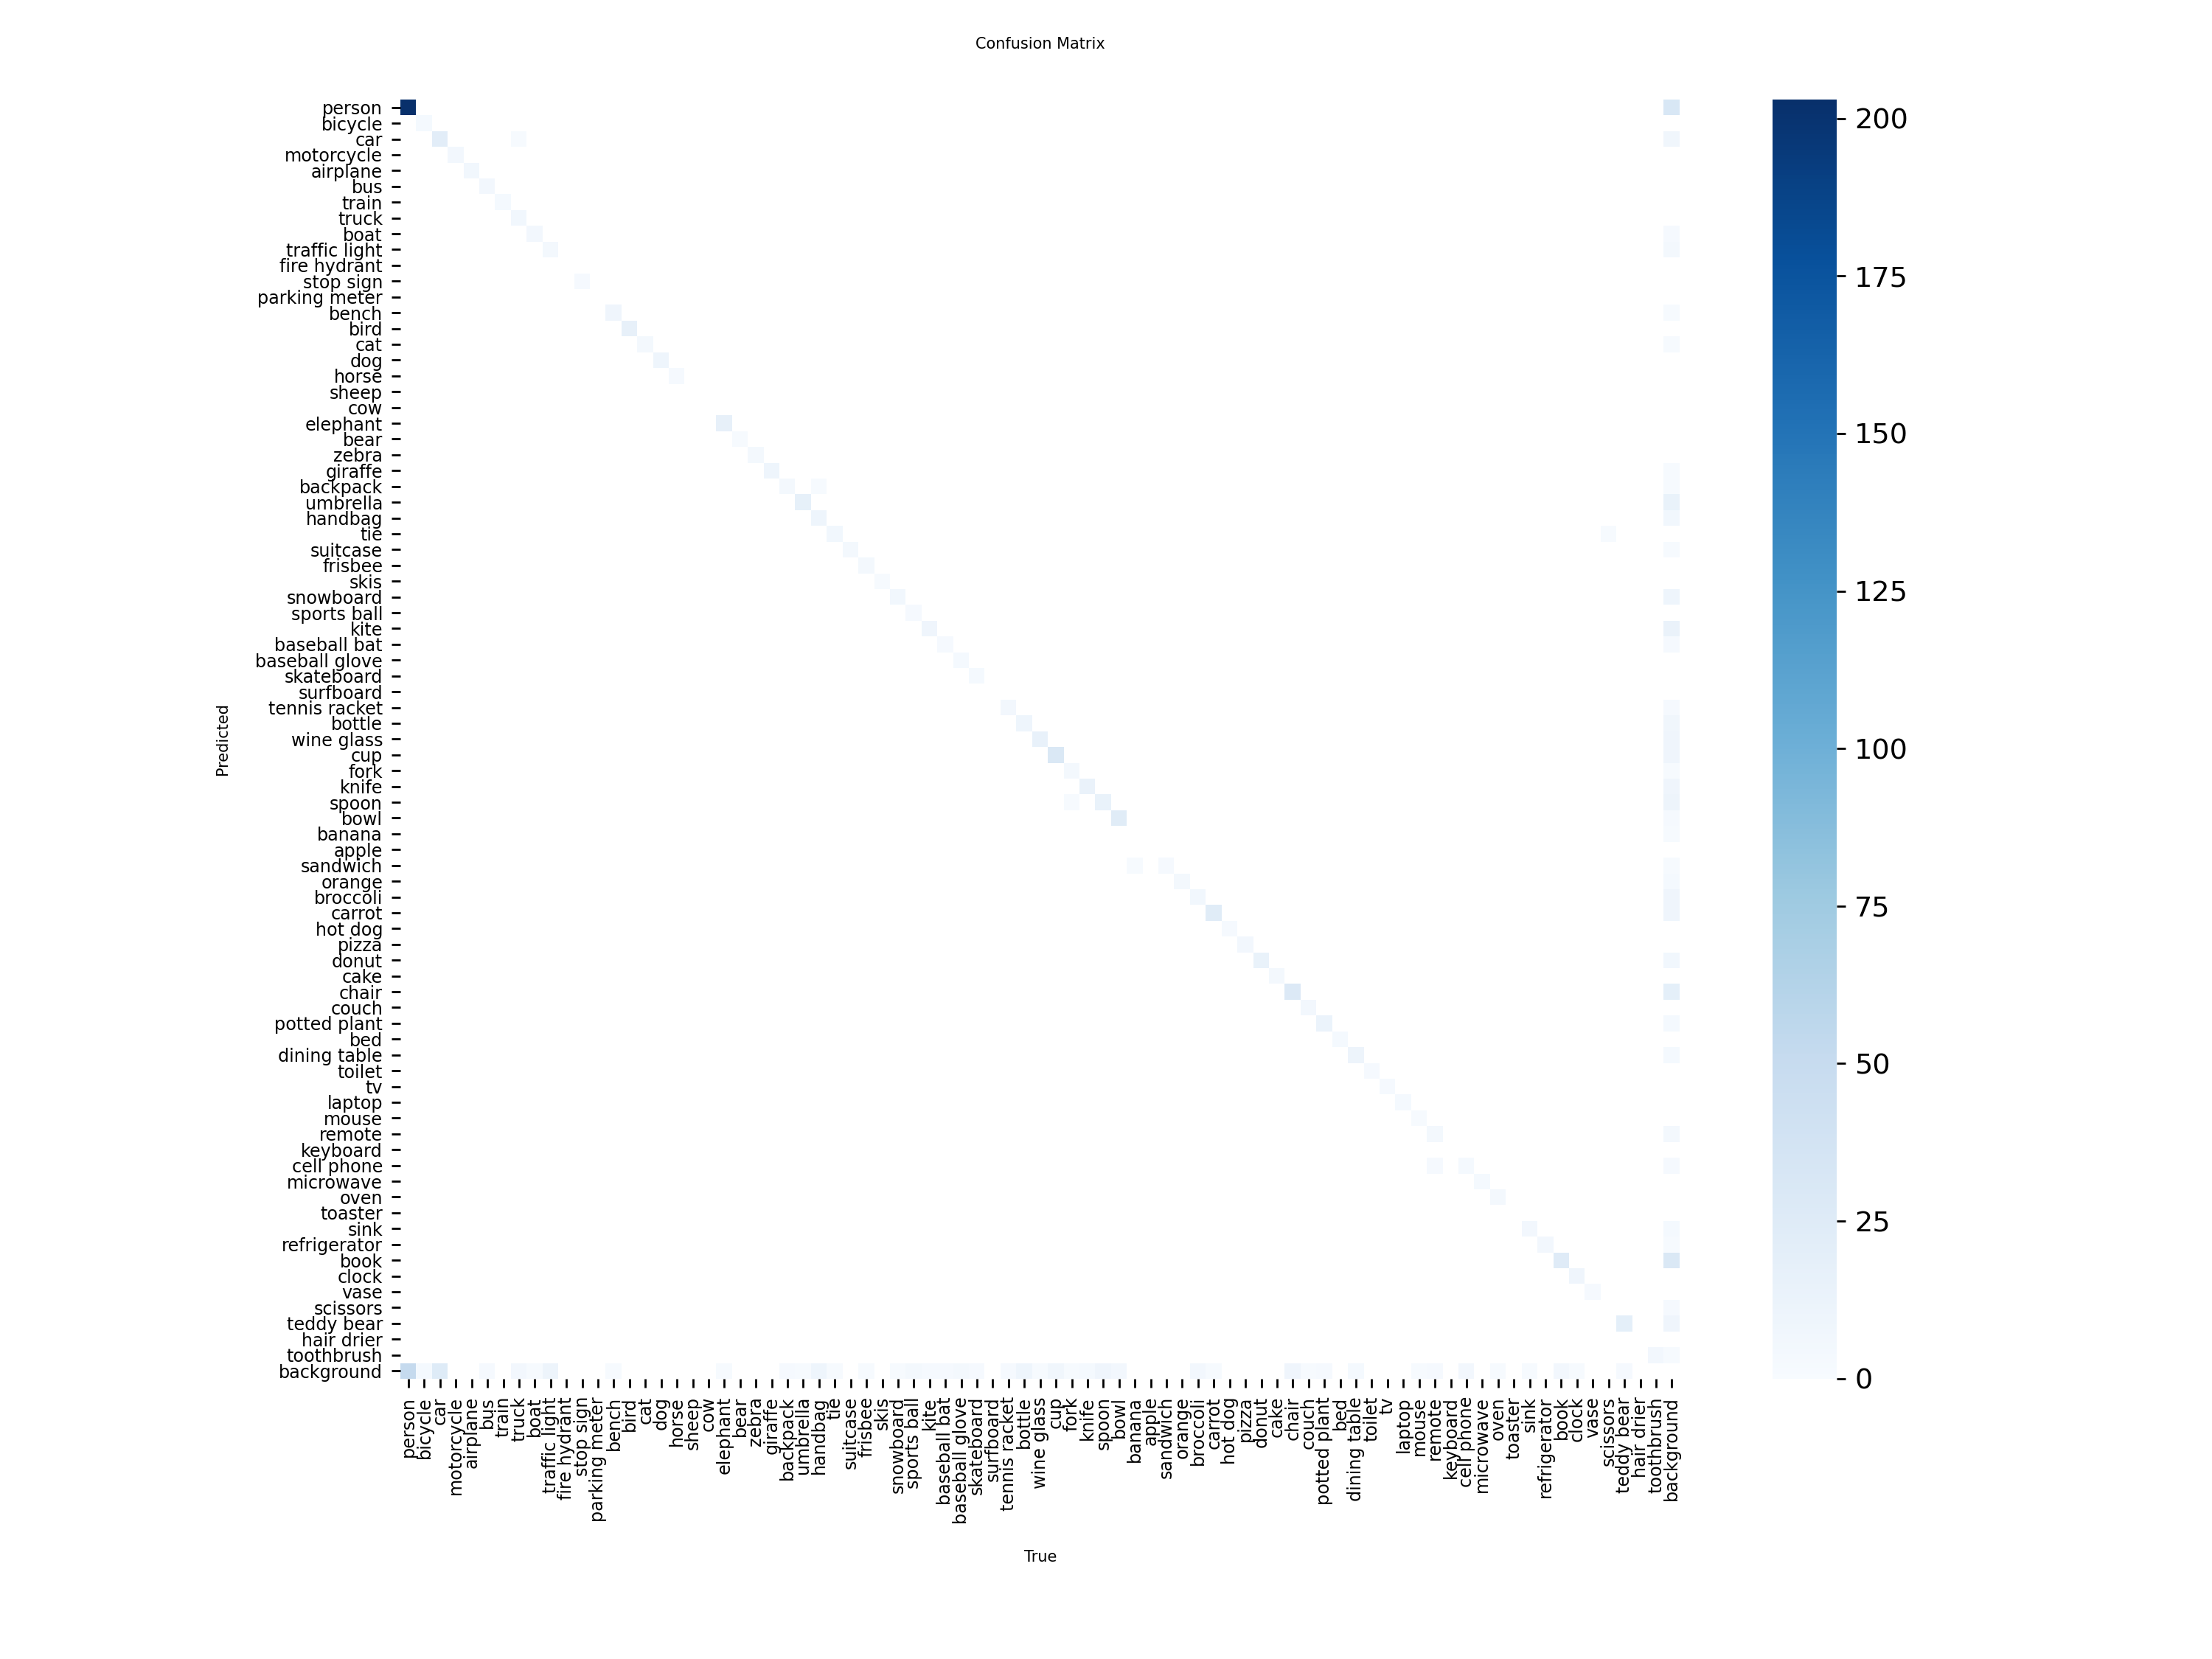


Displaying Training Results:


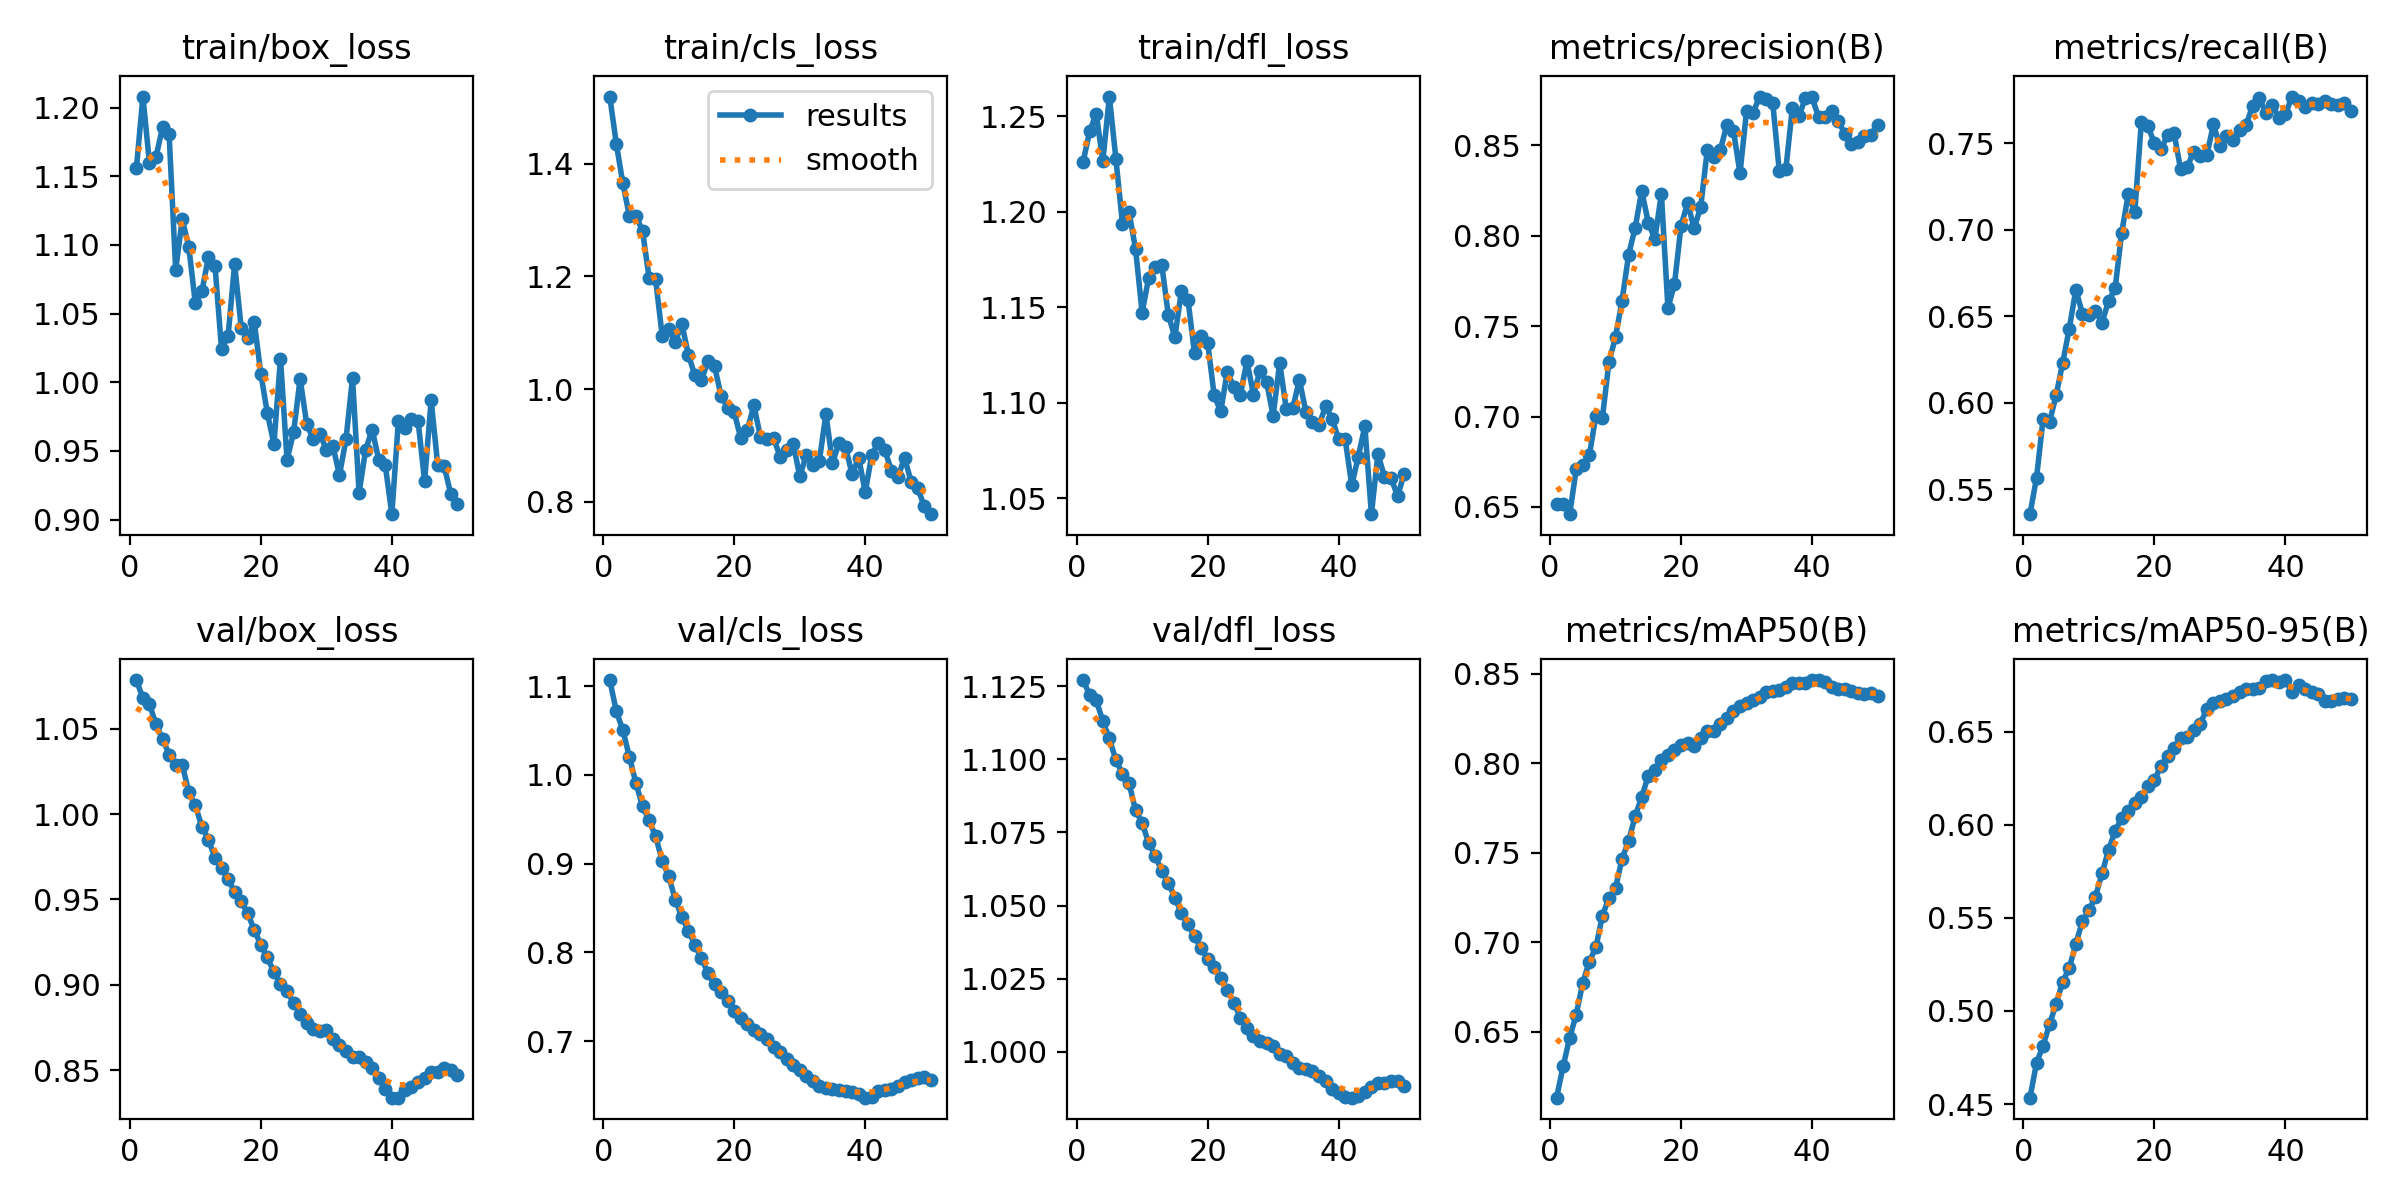

Running inference on sample test images...

0: 640x640 3 persons, 1 bus, 24.1ms
1: 640x640 2 persons, 1 tie, 24.1ms
Speed: 2.6ms preprocess, 24.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/yolo_project/inference_results

Inference results saved to: /content/yolo_project/inference_results

Displaying sample inference results:


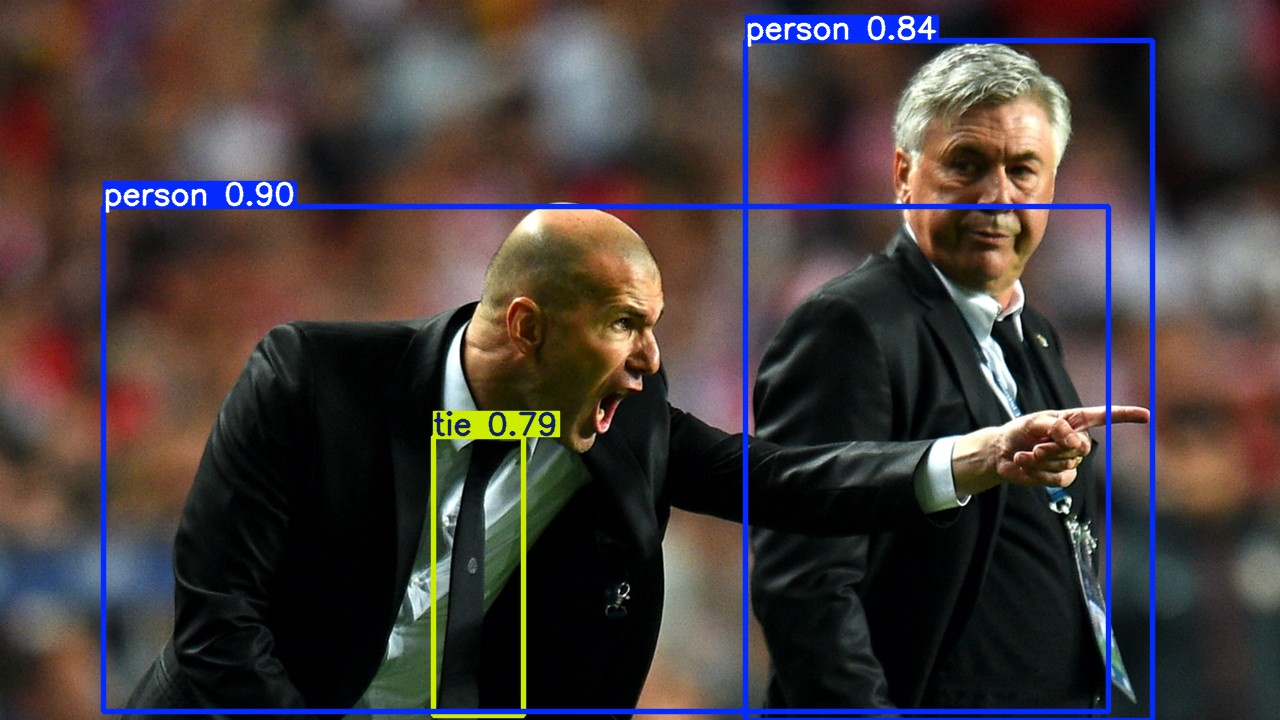

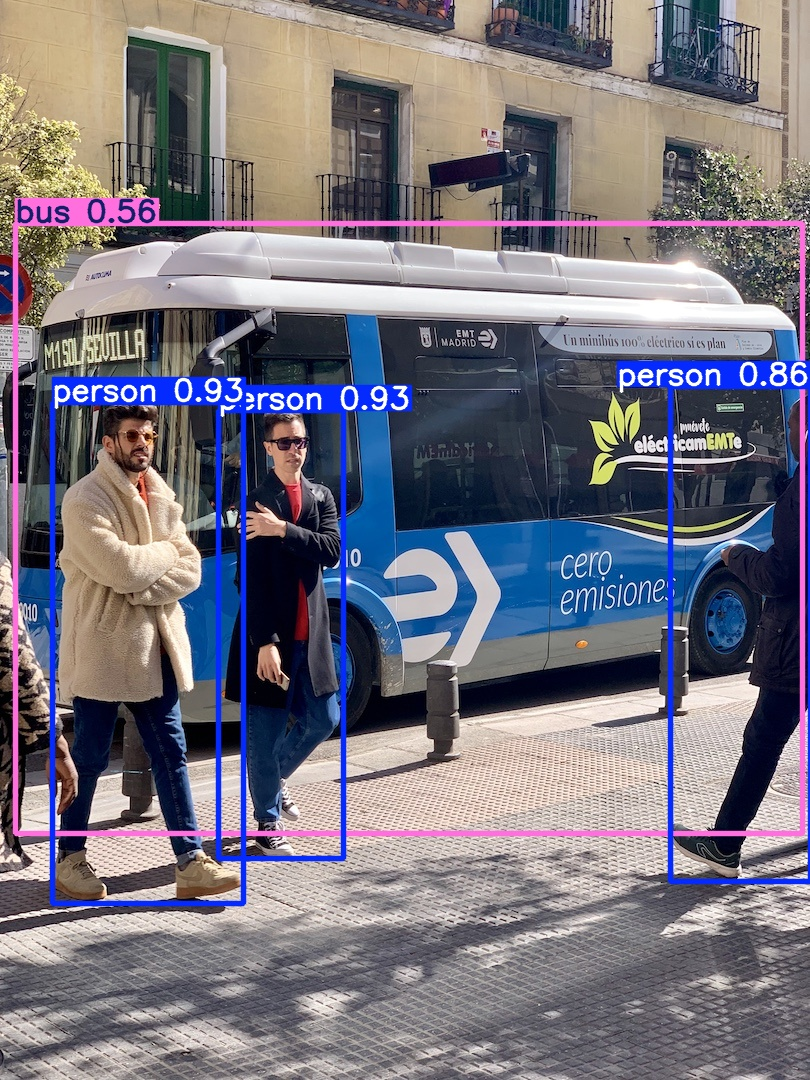


DOWNLOAD YOUR TRAINED MODEL
Click the link below to download your 'best.pt' model file.


/content/yolo_project/coco128_run2/weights/best.pt

In [14]:
'''
YOLOv8 Custom Object Detection with Gradio
Author: [Rhishi Kumar Ayyappan]

- Installs all necessary libraries (ultralytics).
- Uses the built-in 'COCO128' dataset (no downloads or API keys needed).
- Fine-tunes a lightweight YOLOv8-nano model on this dataset.
- Displays all evaluation metrics and plots directly in the notebook.
- Runs inference on sample images and displays the results.
- Provides download links for the final trained model weights.
'''

# =============================
# SECTION 1: Install Libraries & Imports
# =============================
# This cell installs the required packages
!pip install -q ultralytics

import os
import glob
import warnings
import matplotlib.pyplot as plt
import cv2
import yaml
from ultralytics import YOLO
from IPython.display import display, Image, FileLink, HTML

# Suppress warnings
warnings.filterwarnings("ignore")

# =============================
# SECTION 2: Config & Constants
# =============================
# Set a local project directory in the Colab session
PROJECT_DIR = "/content/yolo_project"

# =============================
# SECTION 3: Data & Model Training
# =============================
print("Setting up project directory...")
# Create project directory
os.makedirs(PROJECT_DIR, exist_ok=True)
%cd {PROJECT_DIR}

print("\nStarting model training...")
# Load a pre-trained YOLOv8 'nano' model
model = YOLO('yolov8n.pt')

# Train the model on the built-in COCO128 dataset
# YOLO will automatically download this small dataset
results = model.train(
    data='coco128.yaml',
    epochs=50,
    imgsz=640,
    patience=10,
    project=PROJECT_DIR,
    name="coco128_run"
)

# Get the path to the best trained model
BEST_MODEL_PATH = results.save_dir / "weights/best.pt"
print(f"\nTraining complete. Best model saved to: {BEST_MODEL_PATH}")

# =============================
# SECTION 4: Evaluation & Visuals
# =============================
if 'results' in locals():
    print("Loading best model for evaluation...")
    # Load the best model we just trained
    model = YOLO(BEST_MODEL_PATH)

    # Run validation (metrics are already computed, but this shows how)
    metrics = model.val()
    print(f"\nModel mAP50-95: {metrics.box.map:.4f}")
    print(f"Model mAP50: {metrics.box.map50:.4f}")

    # Display Confusion Matrix
    print("\nDisplaying Confusion Matrix:")
    cm_path = results.save_dir / 'confusion_matrix.png'
    if os.path.exists(cm_path):
        display(Image(filename=cm_path, width=600))
    else:
        print("Confusion matrix image not found.")

    # Display Results Plot (Loss, mAP, etc.)
    print("\nDisplaying Training Results:")
    results_path = results.save_dir / 'results.png'
    if os.path.exists(results_path):
        display(Image(filename=results_path, width=800))
    else:
        print("Results image not found.")

# =============================
# SECTION 5: Inference on Test Images
# =============================
if 'results' in locals():
    print("Running inference on sample test images...")

    # Use standard images from ultralytics for inference
    SAMPLE_IMAGES = ["bus.jpg", "zidane.jpg"]
    !wget -q https://github.com/ultralytics/yolov5/raw/master/data/images/bus.jpg
    !wget -q https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg

    # Run prediction
    predict_results = model.predict(
        source=SAMPLE_IMAGES,
        save=True,
        conf=0.5,
        project=PROJECT_DIR,
        name="inference_results"
    )

    # Get the directory where inference results were saved
    PREDICT_DIR = predict_results[0].save_dir
    print(f"\nInference results saved to: {PREDICT_DIR}")

    # Find and display the predicted images
    test_image_files = glob.glob(f"{PREDICT_DIR}/*.jpg")

    print("\nDisplaying sample inference results:")
    for img_file in test_image_files:
        display(Image(filename=img_file, width=600))

# =============================
# SECTION 6: Download Artifacts
# =============================
if 'results' in locals():
    print("\n============================================")
    print("DOWNLOAD YOUR TRAINED MODEL")
    print("Click the link below to download your 'best.pt' model file.")

    # Create a download link for the best model
    display(FileLink(BEST_MODEL_PATH))
    print("============================================")

# =============================
# SECTION 7: Usage & README (as variable)
# =============================
usage = """
How to Use:
-----------
1. Run the entire notebook (Runtime -> Run all). No API key is needed.
2. The notebook will:
    - Install libraries.
    - Download the built-in COCO128 dataset.
    - Train a YOLOv8n model for 50 epochs.
    - Display evaluation plots (mAP, confusion matrix).
    - Show predictions on test images.
    - Provide a download link for your trained `best.pt` file.
"""

# To view the usage instructions at any time:
# print(usage)

In [ ]:
# =============================
# SECTION 8: Interactive Demo with Gradio
# =============================
# (Run this after Section 6)

!pip install -q gradio

import gradio as gr

print(f"Loading model from: {BEST_MODEL_PATH}")
model = YOLO(BEST_MODEL_PATH)

def yolo_predict(image_input):
    # The model.predict() function returns a list of results
    # We run it and get the first result
    results = model.predict(source=image_input, save=False, conf=0.5)

    # The plot() method draws the bounding boxes on the original image
    # and returns it as a NumPy array
    annotated_image = results[0].plot()

    # Gradio expects the image in RGB format
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    return annotated_image_rgb

# Launch the Gradio interface
if 'model' in locals():
    print("Launching Gradio demo...")
    iface = gr.Interface(
        fn=yolo_predict,
        inputs=gr.Image(type="pil", label="Upload an Image"),
        outputs=gr.Image(type="numpy", label="Model Prediction"),
        title="YOLOv8 Object Detector",
        description="Upload any image to see detections from the COCO128-trained model."
    )
    iface.launch(debug=True, share=True)
else:
    print("Model not trained. Please run all cells above.")

Loading model from: /content/yolo_project/coco128_run2/weights/best.pt
Launching Gradio demo...
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e07a41ee71d2958b1a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 448x640 4 persons, 2 potted plants, 45.3ms
Speed: 2.0ms preprocess, 45.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Created dataset file at: .gradio/flagged/dataset1.csv
